In [1]:
import os
import struct
import shutil
import cv2
import numpy as np
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from skimage.feature import hog
from skimage import exposure,io, color, feature
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_score

In [20]:
# Replace 'your_file.bin' with the actual path to your binary file
file_path = './STL-10/train_y.bin'

# Open the binary file in binary mode ('rb' for read-binary)
with open(file_path, 'rb') as file:
    # Read the entire content of the binary file
    binary_data = file.read()

# Now you can process the binary data as needed
# Convert each byte to decimal and create a list of decimal values
decimal_values = [byte for byte in binary_data]

# Print the decimal values
print("Decimal representation of binary data:", decimal_values)


Decimal representation of binary data: [2, 6, 2, 7, 4, 10, 8, 5, 6, 9, 1, 7, 1, 9, 8, 7, 5, 7, 3, 3, 2, 2, 7, 3, 2, 9, 6, 2, 6, 6, 1, 1, 1, 2, 4, 7, 8, 3, 2, 4, 2, 7, 2, 4, 8, 5, 4, 1, 7, 8, 7, 6, 9, 1, 7, 2, 4, 7, 9, 3, 3, 10, 10, 6, 2, 8, 9, 8, 9, 9, 10, 1, 6, 1, 3, 6, 6, 8, 9, 10, 6, 1, 9, 4, 3, 10, 7, 6, 9, 4, 8, 10, 7, 7, 7, 2, 1, 6, 1, 6, 3, 8, 2, 1, 1, 9, 1, 5, 3, 5, 4, 3, 5, 6, 2, 3, 5, 5, 10, 1, 6, 3, 6, 8, 1, 6, 4, 4, 7, 4, 7, 5, 9, 4, 2, 4, 8, 5, 7, 1, 10, 6, 3, 10, 3, 9, 9, 7, 2, 10, 9, 3, 1, 2, 3, 8, 6, 8, 9, 8, 3, 3, 8, 9, 9, 10, 3, 8, 5, 4, 6, 7, 8, 2, 7, 10, 2, 10, 3, 8, 10, 5, 2, 1, 5, 5, 3, 5, 5, 7, 8, 4, 4, 2, 4, 6, 5, 3, 1, 8, 1, 5, 8, 1, 8, 10, 1, 8, 2, 5, 3, 8, 7, 9, 6, 6, 3, 7, 10, 8, 6, 6, 10, 2, 5, 9, 9, 6, 6, 7, 10, 4, 5, 5, 3, 6, 1, 5, 7, 2, 8, 1, 4, 9, 2, 3, 1, 9, 6, 2, 8, 5, 10, 10, 5, 2, 2, 1, 5, 3, 9, 10, 1, 8, 7, 5, 9, 9, 8, 5, 6, 7, 5, 9, 9, 7, 6, 2, 5, 8, 4, 2, 8, 8, 5, 8, 3, 3, 5, 2, 4, 7, 2, 5, 7, 8, 1, 5, 6, 9, 1, 3, 4, 3, 3, 6, 10, 3, 7, 4, 2, 9, 8

In [25]:
def read_labels_from_binary(file_path):
    with open(file_path, 'rb') as file:
        label_data = file.read()
    labels = [int.from_bytes(label_data[i:i+1], 'big') for i in range(len(label_data))]
    return labels

def rename_and_move_images(data_dir, labels, target_folder):
    # Ensure the target folder exists, or create it
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for i, label in enumerate(labels):
        image_filename = f'train_image_png_{i+1}.png'  # Adjust the filename pattern based on your dataset
        label_name = f'label_{label}'  # Replace this with the actual label names or mapping

        # Ensure the label folder exists, or create it
        label_folder = os.path.join(target_folder, label_name)
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)

        # Rename the file and move it to the label folder
        old_filepath = os.path.join(data_dir, image_filename)
        new_filename = f'{label_name}_{i}.jpg'  # Adjust the filename pattern based on your preference
        new_filepath = os.path.join(label_folder, new_filename)
        os.rename(old_filepath, new_filepath)

        print(f'Moved: {old_filepath} -> {new_filepath}')

# Replace 'labels.bin' with the actual path to your binary label file
label_file_path = './STL-10/train_y.bin'
labels = read_labels_from_binary(label_file_path)

# Replace 'data' with the path to your dataset directory
data_directory = './STL-10/train_images/'
# Replace 'output' with the desired output directory
target_folder = './STL-10/labeled images/'
rename_and_move_images(data_directory, labels, target_folder)

Moved: ./STL-10/train_images/train_image_png_1.png -> ./STL-10/labeled images/label_2\label_2_0.jpg
Moved: ./STL-10/train_images/train_image_png_2.png -> ./STL-10/labeled images/label_6\label_6_1.jpg
Moved: ./STL-10/train_images/train_image_png_3.png -> ./STL-10/labeled images/label_2\label_2_2.jpg
Moved: ./STL-10/train_images/train_image_png_4.png -> ./STL-10/labeled images/label_7\label_7_3.jpg
Moved: ./STL-10/train_images/train_image_png_5.png -> ./STL-10/labeled images/label_4\label_4_4.jpg
Moved: ./STL-10/train_images/train_image_png_6.png -> ./STL-10/labeled images/label_10\label_10_5.jpg
Moved: ./STL-10/train_images/train_image_png_7.png -> ./STL-10/labeled images/label_8\label_8_6.jpg
Moved: ./STL-10/train_images/train_image_png_8.png -> ./STL-10/labeled images/label_5\label_5_7.jpg
Moved: ./STL-10/train_images/train_image_png_9.png -> ./STL-10/labeled images/label_6\label_6_8.jpg
Moved: ./STL-10/train_images/train_image_png_10.png -> ./STL-10/labeled images/label_9\label_9_9.j

Moved: ./STL-10/train_images/train_image_png_545.png -> ./STL-10/labeled images/label_5\label_5_544.jpg
Moved: ./STL-10/train_images/train_image_png_546.png -> ./STL-10/labeled images/label_2\label_2_545.jpg
Moved: ./STL-10/train_images/train_image_png_547.png -> ./STL-10/labeled images/label_2\label_2_546.jpg
Moved: ./STL-10/train_images/train_image_png_548.png -> ./STL-10/labeled images/label_7\label_7_547.jpg
Moved: ./STL-10/train_images/train_image_png_549.png -> ./STL-10/labeled images/label_3\label_3_548.jpg
Moved: ./STL-10/train_images/train_image_png_550.png -> ./STL-10/labeled images/label_7\label_7_549.jpg
Moved: ./STL-10/train_images/train_image_png_551.png -> ./STL-10/labeled images/label_8\label_8_550.jpg
Moved: ./STL-10/train_images/train_image_png_552.png -> ./STL-10/labeled images/label_7\label_7_551.jpg
Moved: ./STL-10/train_images/train_image_png_553.png -> ./STL-10/labeled images/label_8\label_8_552.jpg
Moved: ./STL-10/train_images/train_image_png_554.png -> ./STL-10

Moved: ./STL-10/train_images/train_image_png_1102.png -> ./STL-10/labeled images/label_4\label_4_1101.jpg
Moved: ./STL-10/train_images/train_image_png_1103.png -> ./STL-10/labeled images/label_7\label_7_1102.jpg
Moved: ./STL-10/train_images/train_image_png_1104.png -> ./STL-10/labeled images/label_6\label_6_1103.jpg
Moved: ./STL-10/train_images/train_image_png_1105.png -> ./STL-10/labeled images/label_2\label_2_1104.jpg
Moved: ./STL-10/train_images/train_image_png_1106.png -> ./STL-10/labeled images/label_4\label_4_1105.jpg
Moved: ./STL-10/train_images/train_image_png_1107.png -> ./STL-10/labeled images/label_1\label_1_1106.jpg
Moved: ./STL-10/train_images/train_image_png_1108.png -> ./STL-10/labeled images/label_6\label_6_1107.jpg
Moved: ./STL-10/train_images/train_image_png_1109.png -> ./STL-10/labeled images/label_3\label_3_1108.jpg
Moved: ./STL-10/train_images/train_image_png_1110.png -> ./STL-10/labeled images/label_5\label_5_1109.jpg
Moved: ./STL-10/train_images/train_image_png_1

Moved: ./STL-10/train_images/train_image_png_1634.png -> ./STL-10/labeled images/label_4\label_4_1633.jpg
Moved: ./STL-10/train_images/train_image_png_1635.png -> ./STL-10/labeled images/label_10\label_10_1634.jpg
Moved: ./STL-10/train_images/train_image_png_1636.png -> ./STL-10/labeled images/label_6\label_6_1635.jpg
Moved: ./STL-10/train_images/train_image_png_1637.png -> ./STL-10/labeled images/label_4\label_4_1636.jpg
Moved: ./STL-10/train_images/train_image_png_1638.png -> ./STL-10/labeled images/label_4\label_4_1637.jpg
Moved: ./STL-10/train_images/train_image_png_1639.png -> ./STL-10/labeled images/label_1\label_1_1638.jpg
Moved: ./STL-10/train_images/train_image_png_1640.png -> ./STL-10/labeled images/label_3\label_3_1639.jpg
Moved: ./STL-10/train_images/train_image_png_1641.png -> ./STL-10/labeled images/label_10\label_10_1640.jpg
Moved: ./STL-10/train_images/train_image_png_1642.png -> ./STL-10/labeled images/label_1\label_1_1641.jpg
Moved: ./STL-10/train_images/train_image_p

Moved: ./STL-10/train_images/train_image_png_2176.png -> ./STL-10/labeled images/label_9\label_9_2175.jpg
Moved: ./STL-10/train_images/train_image_png_2177.png -> ./STL-10/labeled images/label_7\label_7_2176.jpg
Moved: ./STL-10/train_images/train_image_png_2178.png -> ./STL-10/labeled images/label_7\label_7_2177.jpg
Moved: ./STL-10/train_images/train_image_png_2179.png -> ./STL-10/labeled images/label_5\label_5_2178.jpg
Moved: ./STL-10/train_images/train_image_png_2180.png -> ./STL-10/labeled images/label_5\label_5_2179.jpg
Moved: ./STL-10/train_images/train_image_png_2181.png -> ./STL-10/labeled images/label_5\label_5_2180.jpg
Moved: ./STL-10/train_images/train_image_png_2182.png -> ./STL-10/labeled images/label_7\label_7_2181.jpg
Moved: ./STL-10/train_images/train_image_png_2183.png -> ./STL-10/labeled images/label_4\label_4_2182.jpg
Moved: ./STL-10/train_images/train_image_png_2184.png -> ./STL-10/labeled images/label_6\label_6_2183.jpg
Moved: ./STL-10/train_images/train_image_png_2

Moved: ./STL-10/train_images/train_image_png_2622.png -> ./STL-10/labeled images/label_7\label_7_2621.jpg
Moved: ./STL-10/train_images/train_image_png_2623.png -> ./STL-10/labeled images/label_5\label_5_2622.jpg
Moved: ./STL-10/train_images/train_image_png_2624.png -> ./STL-10/labeled images/label_7\label_7_2623.jpg
Moved: ./STL-10/train_images/train_image_png_2625.png -> ./STL-10/labeled images/label_5\label_5_2624.jpg
Moved: ./STL-10/train_images/train_image_png_2626.png -> ./STL-10/labeled images/label_7\label_7_2625.jpg
Moved: ./STL-10/train_images/train_image_png_2627.png -> ./STL-10/labeled images/label_5\label_5_2626.jpg
Moved: ./STL-10/train_images/train_image_png_2628.png -> ./STL-10/labeled images/label_5\label_5_2627.jpg
Moved: ./STL-10/train_images/train_image_png_2629.png -> ./STL-10/labeled images/label_8\label_8_2628.jpg
Moved: ./STL-10/train_images/train_image_png_2630.png -> ./STL-10/labeled images/label_8\label_8_2629.jpg
Moved: ./STL-10/train_images/train_image_png_2

Moved: ./STL-10/train_images/train_image_png_3059.png -> ./STL-10/labeled images/label_1\label_1_3058.jpg
Moved: ./STL-10/train_images/train_image_png_3060.png -> ./STL-10/labeled images/label_6\label_6_3059.jpg
Moved: ./STL-10/train_images/train_image_png_3061.png -> ./STL-10/labeled images/label_5\label_5_3060.jpg
Moved: ./STL-10/train_images/train_image_png_3062.png -> ./STL-10/labeled images/label_1\label_1_3061.jpg
Moved: ./STL-10/train_images/train_image_png_3063.png -> ./STL-10/labeled images/label_4\label_4_3062.jpg
Moved: ./STL-10/train_images/train_image_png_3064.png -> ./STL-10/labeled images/label_8\label_8_3063.jpg
Moved: ./STL-10/train_images/train_image_png_3065.png -> ./STL-10/labeled images/label_10\label_10_3064.jpg
Moved: ./STL-10/train_images/train_image_png_3066.png -> ./STL-10/labeled images/label_9\label_9_3065.jpg
Moved: ./STL-10/train_images/train_image_png_3067.png -> ./STL-10/labeled images/label_6\label_6_3066.jpg
Moved: ./STL-10/train_images/train_image_png

Moved: ./STL-10/train_images/train_image_png_3484.png -> ./STL-10/labeled images/label_9\label_9_3483.jpg
Moved: ./STL-10/train_images/train_image_png_3485.png -> ./STL-10/labeled images/label_5\label_5_3484.jpg
Moved: ./STL-10/train_images/train_image_png_3486.png -> ./STL-10/labeled images/label_3\label_3_3485.jpg
Moved: ./STL-10/train_images/train_image_png_3487.png -> ./STL-10/labeled images/label_9\label_9_3486.jpg
Moved: ./STL-10/train_images/train_image_png_3488.png -> ./STL-10/labeled images/label_9\label_9_3487.jpg
Moved: ./STL-10/train_images/train_image_png_3489.png -> ./STL-10/labeled images/label_7\label_7_3488.jpg
Moved: ./STL-10/train_images/train_image_png_3490.png -> ./STL-10/labeled images/label_5\label_5_3489.jpg
Moved: ./STL-10/train_images/train_image_png_3491.png -> ./STL-10/labeled images/label_6\label_6_3490.jpg
Moved: ./STL-10/train_images/train_image_png_3492.png -> ./STL-10/labeled images/label_8\label_8_3491.jpg
Moved: ./STL-10/train_images/train_image_png_3

Moved: ./STL-10/train_images/train_image_png_3918.png -> ./STL-10/labeled images/label_7\label_7_3917.jpg
Moved: ./STL-10/train_images/train_image_png_3919.png -> ./STL-10/labeled images/label_8\label_8_3918.jpg
Moved: ./STL-10/train_images/train_image_png_3920.png -> ./STL-10/labeled images/label_4\label_4_3919.jpg
Moved: ./STL-10/train_images/train_image_png_3921.png -> ./STL-10/labeled images/label_1\label_1_3920.jpg
Moved: ./STL-10/train_images/train_image_png_3922.png -> ./STL-10/labeled images/label_9\label_9_3921.jpg
Moved: ./STL-10/train_images/train_image_png_3923.png -> ./STL-10/labeled images/label_4\label_4_3922.jpg
Moved: ./STL-10/train_images/train_image_png_3924.png -> ./STL-10/labeled images/label_3\label_3_3923.jpg
Moved: ./STL-10/train_images/train_image_png_3925.png -> ./STL-10/labeled images/label_5\label_5_3924.jpg
Moved: ./STL-10/train_images/train_image_png_3926.png -> ./STL-10/labeled images/label_10\label_10_3925.jpg
Moved: ./STL-10/train_images/train_image_png

Moved: ./STL-10/train_images/train_image_png_4269.png -> ./STL-10/labeled images/label_3\label_3_4268.jpg
Moved: ./STL-10/train_images/train_image_png_4270.png -> ./STL-10/labeled images/label_2\label_2_4269.jpg
Moved: ./STL-10/train_images/train_image_png_4271.png -> ./STL-10/labeled images/label_1\label_1_4270.jpg
Moved: ./STL-10/train_images/train_image_png_4272.png -> ./STL-10/labeled images/label_4\label_4_4271.jpg
Moved: ./STL-10/train_images/train_image_png_4273.png -> ./STL-10/labeled images/label_6\label_6_4272.jpg
Moved: ./STL-10/train_images/train_image_png_4274.png -> ./STL-10/labeled images/label_2\label_2_4273.jpg
Moved: ./STL-10/train_images/train_image_png_4275.png -> ./STL-10/labeled images/label_3\label_3_4274.jpg
Moved: ./STL-10/train_images/train_image_png_4276.png -> ./STL-10/labeled images/label_4\label_4_4275.jpg
Moved: ./STL-10/train_images/train_image_png_4277.png -> ./STL-10/labeled images/label_8\label_8_4276.jpg
Moved: ./STL-10/train_images/train_image_png_4

Moved: ./STL-10/train_images/train_image_png_4704.png -> ./STL-10/labeled images/label_9\label_9_4703.jpg
Moved: ./STL-10/train_images/train_image_png_4705.png -> ./STL-10/labeled images/label_8\label_8_4704.jpg
Moved: ./STL-10/train_images/train_image_png_4706.png -> ./STL-10/labeled images/label_10\label_10_4705.jpg
Moved: ./STL-10/train_images/train_image_png_4707.png -> ./STL-10/labeled images/label_6\label_6_4706.jpg
Moved: ./STL-10/train_images/train_image_png_4708.png -> ./STL-10/labeled images/label_3\label_3_4707.jpg
Moved: ./STL-10/train_images/train_image_png_4709.png -> ./STL-10/labeled images/label_7\label_7_4708.jpg
Moved: ./STL-10/train_images/train_image_png_4710.png -> ./STL-10/labeled images/label_2\label_2_4709.jpg
Moved: ./STL-10/train_images/train_image_png_4711.png -> ./STL-10/labeled images/label_2\label_2_4710.jpg
Moved: ./STL-10/train_images/train_image_png_4712.png -> ./STL-10/labeled images/label_5\label_5_4711.jpg
Moved: ./STL-10/train_images/train_image_png

In [27]:
def load_images_from_folder(folder_path):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Add more file extensions as needed
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            
            # Assuming you have a naming convention where the class label is in the filename
            label = filename.split('_')[0]  # Modify this based on your naming convention
            
            # Remove non-alphabetic characters from the label
            label = ''.join(filter(str.isalpha, label))
            
            if img is not None:
                images.append(img)
                labels.append(label)

    return images, labels

def preprocess_images(images):
    processed_images = []
    for img in images:
        # Convert to grayscale
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        resized_img = cv2.resize(img, (64, 64)) 
        
        # Flatten the image
        flattened_img = resized_img.flatten()
        
        processed_images.append(flattened_img)
    
    return np.array(processed_images)


folder_path = 'STL-10/labeled images/'
images, labels = load_images_from_folder(folder_path)

processed_images = preprocess_images(images)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

df = pd.DataFrame(processed_images)
df['label'] = encoded_labels

csv_filename = 'image_data1.csv'
df.to_csv(csv_filename, index=False)

In [2]:
sheet = pd.read_csv('image_data1.csv')
sheet.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,177,175,177,188,182,182,181,174,175,183,...,87,87,83,89,88,84,87,86,81,0
1,136,145,156,114,127,136,114,126,136,135,...,126,141,157,125,139,155,122,133,150,0
2,149,168,155,142,160,154,117,133,137,96,...,118,177,111,120,166,108,126,158,126,0
3,65,118,84,60,125,85,58,126,86,55,...,59,87,61,60,86,66,55,82,61,0
4,97,108,102,126,154,151,118,202,177,112,...,14,25,32,25,30,32,27,31,33,0


In [3]:
sheet.info()
sheet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 12289 entries, 0 to label
dtypes: int64(12289)
memory usage: 243.8 MB


,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,93.294231,100.525385,96.520769,94.479615,102.070000,97.994615,94.828462,102.212692,98.245769,95.273462,...,79.075385,87.443846,85.085385,78.798846,87.110000,84.686154,78.124231,86.523077,84.005769,0.500000
std,81.241431,79.144012,78.034850,81.573089,79.448952,78.415704,81.339899,79.168489,78.179286,81.375186,...,65.100618,67.815584,69.150602,65.524145,68.197912,69.578370,66.017530,68.562929,69.714779,0.500096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,3.000000,4.000000,6.000000,4.000000,5.000000,7.750000,5.000000,6.000000,...,13.000000,18.000000,15.000000,12.000000,16.000000,13.750000,10.000000,14.000000,12.000000,0.000000
50%,82.000000,104.000000,96.000000,84.000000,107.000000,99.500000,85.500000,107.000000,101.000000,86.000000,...,77.000000,90.000000,80.000000,75.500000,90.000000,80.000000,74.000000,88.000000,81.000000,0.500000
75%,160.000000,164.000000,160.000000,161.000000,165.250000,159.000000,161.000000,166.000000,160.000000,162.000000,...,128.000000,139.000000,136.000000,126.250000,137.000000,135.000000,127.000000,137.000000,134.000000,1.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000


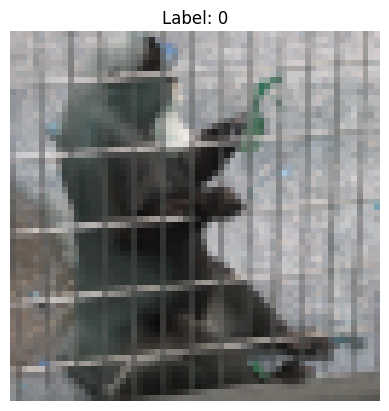

In [18]:
# Example: Display the first image in the DataFrame
first_image = np.array(sheet.iloc[0, :-1]).reshape(64, 64,3)  # Assuming images are 96x96 pixels with 1 channel
plt.imshow(first_image) 
plt.title(f'Label: {sheet.iloc[0, -1]}')
plt.axis('off')
plt.show()

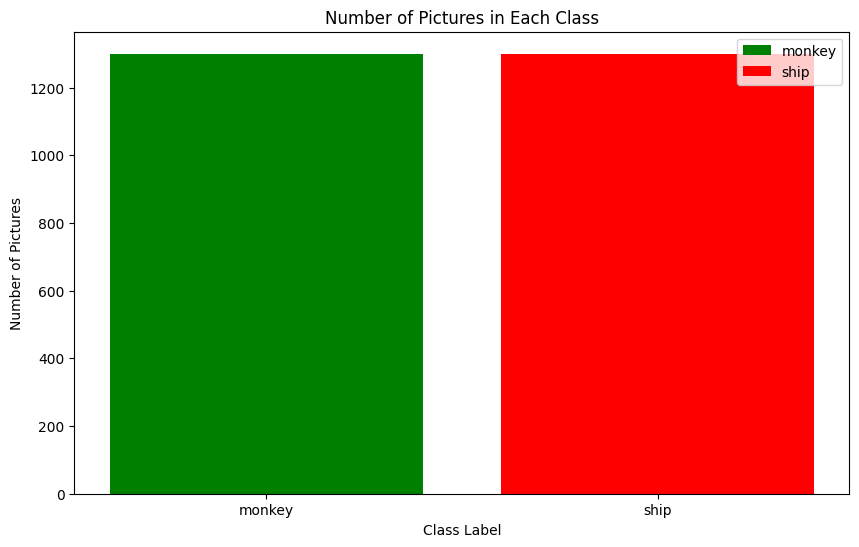

In [4]:
# Specify colors for each class
colors = {0: 'green', 1: 'red'}  # Adjust based on your actual class labels

# Map class labels to names
class_names = {0:'monkey',1:'ship'}  # Replace with your actual class names

# Plot a histogram with different colors for each class
plt.figure(figsize=(10, 6))
for label, color in colors.items():
    class_data = sheet[sheet['label'] == label]
    class_name = class_names.get(label, f'Class_{label}')  # Default to a generic name if not found
    plt.bar(class_name, len(class_data), color=color, label=class_name)

plt.title('Number of Pictures in Each Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Pictures')
plt.legend()
plt.show()

In [5]:
# Extract features (X) and labels (y)
X = sheet.drop('label', axis=1)  # Assuming the label column is named 'label'
y = sheet['label']

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Step 1: Split the data into training and remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=301)

# Step 2: Split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=101)

# Print the sizes of each set
print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_valid)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 1820 samples
Validation set size: 390 samples
Test set size: 390 samples


In [63]:
# Initialize the logistic regression model
model = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'tol':[0.01,0.1],
    'C': [1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
with tqdm(total=len(param_grid['C']) * len(param_grid['penalty']) * len(param_grid['max_iter']) * len(param_grid['solver'])) as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update()

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

  2%|█▋                                                                              | 1/48 [11:14<8:48:22, 674.53s/it]

Best Hyperparameters: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}
Test Accuracy: 0.8897435897435897


In [6]:
# Standardize features (important for 'saga' solver)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with L1 regularization
logreg_model = LogisticRegression(tol=0.01,max_iter=200,solver='saga', penalty='l2',C=100)

# Lists to store training and validation accuracies
train_accuracies = []
valid_accuracies = []

# Training loop
num_epochs = 10  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    # Fit the model to the training data
    logreg_model.fit(X_train, y_train)

    # Make predictions on the training and validation sets
    y_train_pred = logreg_model.predict(X_train)
    y_valid_pred = logreg_model.predict(X_valid)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)

    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    # Print or log the accuracy for each epoch
    print(f'Epoch {epoch + 1}/{num_epochs} - Training Accuracy: {train_accuracy:.4f} - Validation Accuracy: {valid_accuracy:.4f}')

Epoch 1/10 - Training Accuracy: 0.9604 - Validation Accuracy: 0.8821
Epoch 2/10 - Training Accuracy: 0.9599 - Validation Accuracy: 0.8821
Epoch 3/10 - Training Accuracy: 0.9604 - Validation Accuracy: 0.8821
Epoch 4/10 - Training Accuracy: 0.9604 - Validation Accuracy: 0.8821
Epoch 5/10 - Training Accuracy: 0.9610 - Validation Accuracy: 0.8821
Epoch 6/10 - Training Accuracy: 0.9610 - Validation Accuracy: 0.8821
Epoch 7/10 - Training Accuracy: 0.9604 - Validation Accuracy: 0.8821
Epoch 8/10 - Training Accuracy: 0.9599 - Validation Accuracy: 0.8821
Epoch 9/10 - Training Accuracy: 0.9610 - Validation Accuracy: 0.8821
Epoch 10/10 - Training Accuracy: 0.9610 - Validation Accuracy: 0.8821


In [10]:
# Perform 5-fold cross-validation (you can adjust the 'cv' parameter)
cross_val_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.88653846 0.91923077 0.91538462 0.91538462 0.89615385]
Mean Accuracy: 0.9065384615384614


In [7]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix (Test):\n", confusion_matrix_test)

Accuracy: 0.8897435897435897
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       190
           1       0.90      0.89      0.89       200

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390

Confusion Matrix (Test):
 [[170  20]
 [ 23 177]]


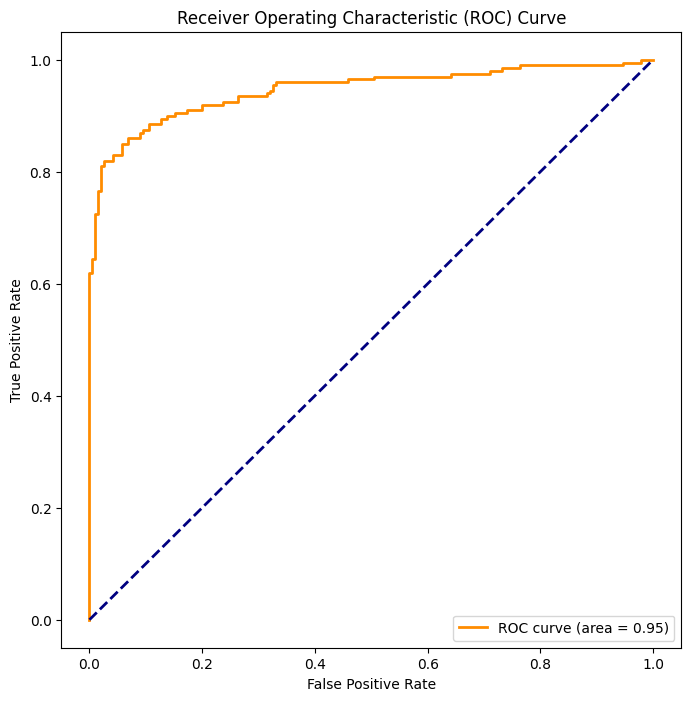

In [8]:
# Assuming 'y_true' is the true labels and 'y_pred_probs' are predicted probabilities
y_pred_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
# Load and resize the image
image = cv2.imread('ship2.jpg')
target_size = (64, 64)
resized_image = cv2.resize(image, target_size)

# Normalize and flatten the image
flattened_image = resized_image.flatten()

# Reshape the flattened image to a 2D array
reshaped_image = flattened_image.reshape(1, -1)

# Make predictions
predictions = logreg_model.predict(reshaped_image)

print(predictions)

[1]


C:\Users\Dell\anaconda3\envs\djangoenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
